#**Bike and Car Classification Tester**
###**Nombre:** Pablo Ortiz
###**Matrícula:** A01023791

In [1]:
import tensorflow as tf
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
####################### CAMBIAR AQUÍ DIRECTORIO ######################
os.chdir("/content/gdrive/My Drive/Concentración IA/Proyecto Clasificación de Imagenes/")

In [4]:
model_path = os.path.join('models', 'imageclassifier.h5')
loaded_model = load_model(model_path)

In [5]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [6]:
def predict_image(image_path, model):
    img = preprocess_image(image_path)

    prediction = model.predict(img)
    print("Raw Prediction Values:", prediction)

    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

    if prediction[0][0] < 0.5:
      plt.title(f"Prediction Bike: {prediction[0][0]:.2f}")

    else:
      plt.title(f"Prediction Car: {prediction[0][0]:.2f}")
    plt.show()

1/1 [==============================] - 1s 989ms/step
Raw Prediction Values: [[0.49212047]]


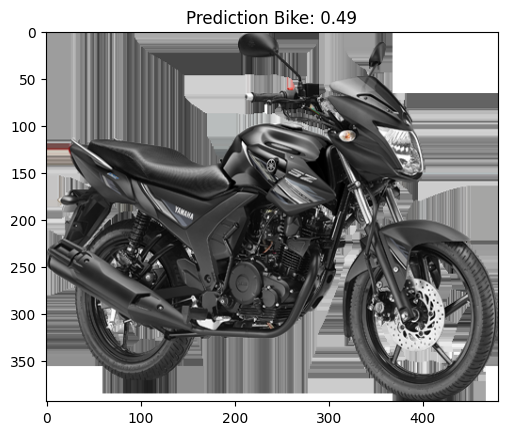

In [7]:
####################### CAMBIAR AQUÍ IMAGEN QUE SE DESEA PROBAR ######################
test_image_path = "Car-Bike-Dataset/Bike/Bike (5).png"
predict_image(test_image_path, loaded_model)